In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Item 2: Análise univariada de todos os preditores

In [2]:
# lendo o dataset
wp = pd.read_csv('dataset\water_potability.csv')
wp.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
#forma do dataset com todas as linhas
wp.shape

(3276, 10)

In [4]:
#forma do dataset sem as linhas com dados faltando
wp_new = wp.dropna()
wp_new.shape

(2011, 10)

In [5]:
# média de cada coluna
wp_new.mean()

ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64

In [15]:
# desvio padrão de cada coluna
wp_new.std()

ph                    1.573337
Hardness             32.635085
Solids             8642.239815
Chloramines           1.584820
Sulfate              41.205172
Conductivity         80.712572
Organic_carbon        3.324959
Trihalomethanes      16.077109
Turbidity             0.780346
Potability            0.490678
dtype: float64

In [17]:
wp_new.skew()

ph                 0.048947
Hardness          -0.085237
Solids             0.595894
Chloramines        0.012976
Sulfate           -0.046558
Conductivity       0.266869
Organic_carbon    -0.020018
Trihalomethanes   -0.051422
Turbidity         -0.033051
Potability         0.394614
dtype: float64

In [27]:
np.median(wp_new['Sulfate'])

ModeResult(mode=129.00000000000003, count=1)

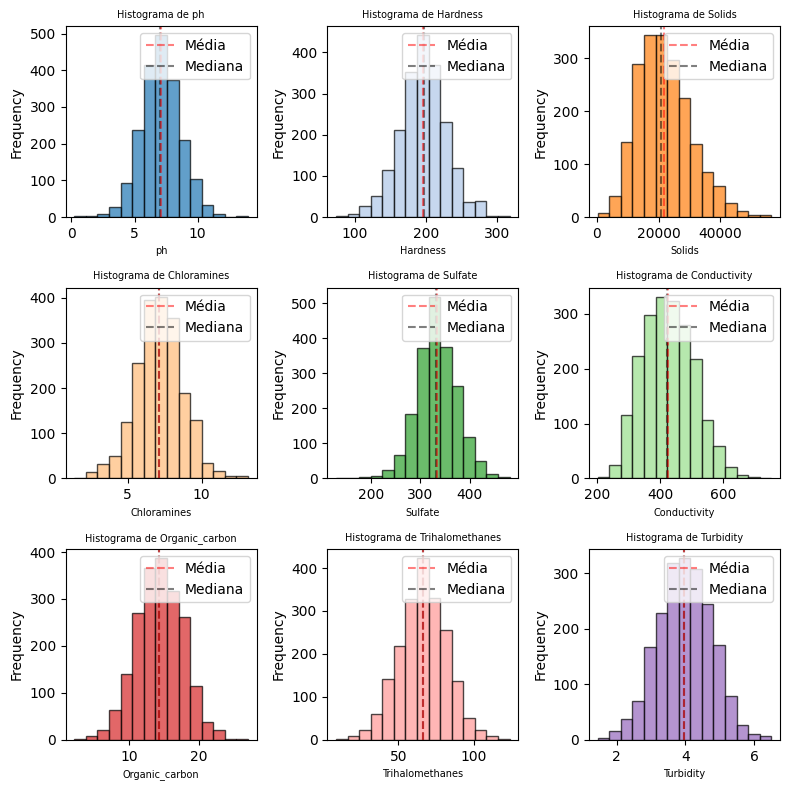

In [45]:
# configura o plot dos histogramas
num_histograms = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes_flat = axes.flatten()
colors = plt.cm.tab20.colors[:num_histograms]

# percorre a matriz de variáveis numéricas e plota histogramas de diferentes cores
for i, (column, ax) in enumerate(zip(wp_new.columns, axes_flat)):
    wp_new[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histograma de {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)   
    mediana = ax.axvline(np.median(wp_new[column]), color="black", ls="--", alpha=0.5, label="Mediana")
    media = ax.axvline(np.mean(wp_new[column]), color="red", ls="--", alpha = 0.5, label="Média")
    ax.legend(handles=[media,mediana]);

# ajusta o layout
plt.tight_layout()
plt.show()


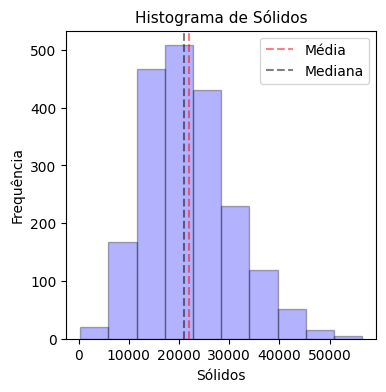

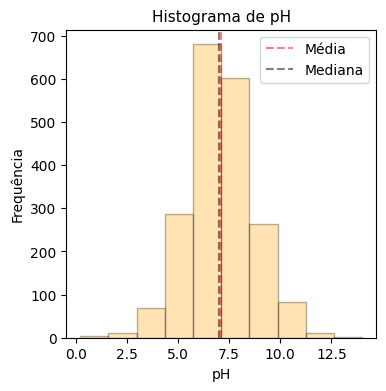

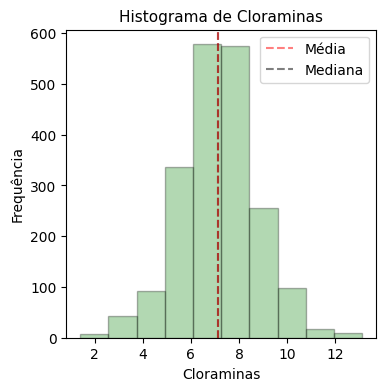

In [61]:
fig1, ax1 = plt.subplots(figsize = (4, 4))
ax1.hist(wp_new['Solids'], edgecolor="black", color='blue', alpha=0.3)
ax1.set_title('Histograma de Sólidos', fontsize=11)
ax1.set_xlabel('Sólidos')
ax1.set_ylabel('Frequência')
mediana = ax1.axvline(np.median(wp_new['Solids']), color="black", ls="--", alpha=0.5, label="Mediana")
media = ax1.axvline(np.mean(wp_new['Solids']), color="red", ls="--", alpha = 0.5, label="Média")
ax1.legend(handles=[media,mediana])

fig2, ax2 = plt.subplots(figsize = (4, 4))
ax2.hist(wp_new['ph'], edgecolor="black", color='Orange', alpha=0.3)
ax2.set_title('Histograma de pH', fontsize=11)
ax2.set_xlabel('pH')
ax2.set_ylabel('Frequência')
mediana = ax2.axvline(np.median(wp_new['ph']), color="black", ls="--", alpha=0.5, label="Mediana")
media = ax2.axvline(np.mean(wp_new['ph']), color="red", ls="--", alpha = 0.5, label="Média")
ax2.legend(handles=[media,mediana])

fig3, ax3 = plt.subplots(figsize = (4, 4))
ax3.hist(wp_new['Chloramines'], edgecolor="black", color='green', alpha=0.3)
ax3.set_title('Histograma de Cloraminas', fontsize=11)
ax3.set_xlabel('Cloraminas')
ax3.set_ylabel('Frequência')
mediana = ax3.axvline(np.median(wp_new['Chloramines']), color="black", ls="--", alpha=0.5, label="Mediana")
media = ax3.axvline(np.mean(wp_new['Chloramines']), color="red", ls="--", alpha = 0.5, label="Média")
ax3.legend(handles=[media,mediana])


c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


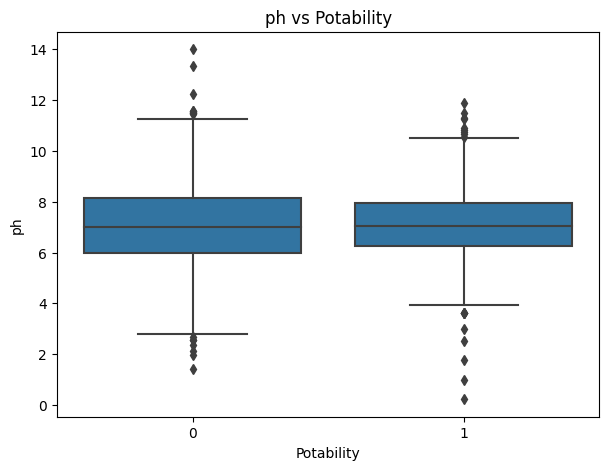

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


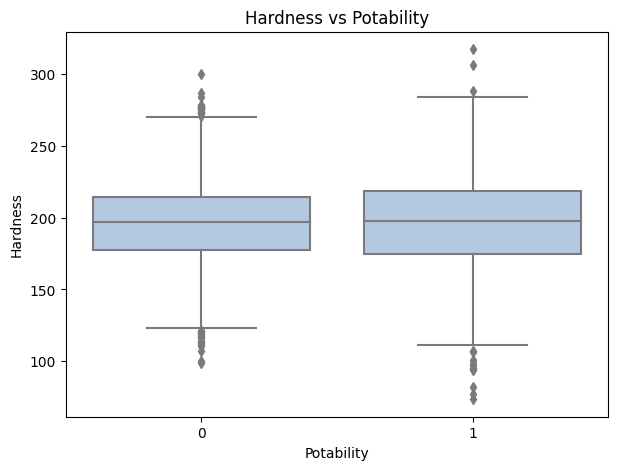

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


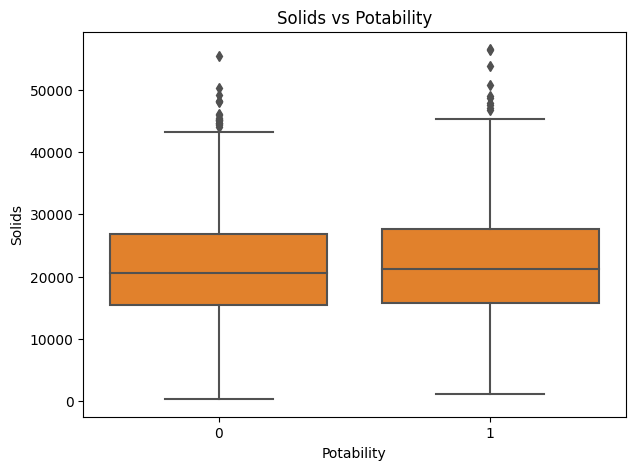

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


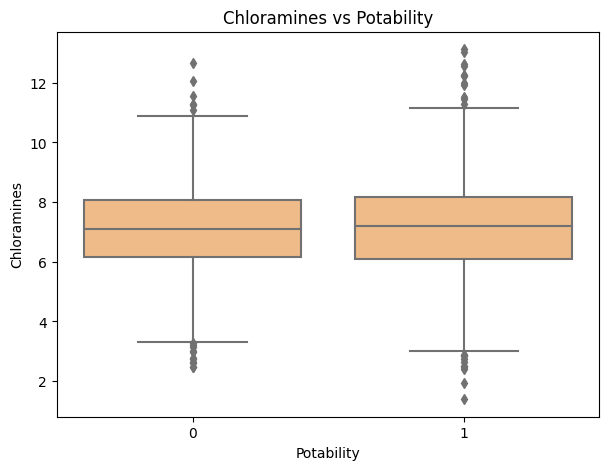

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


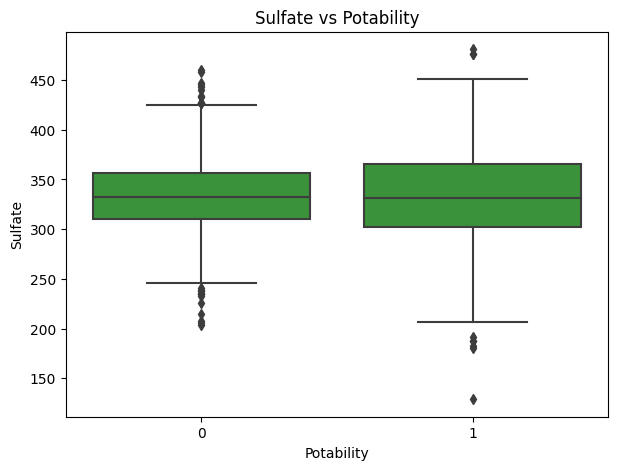

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


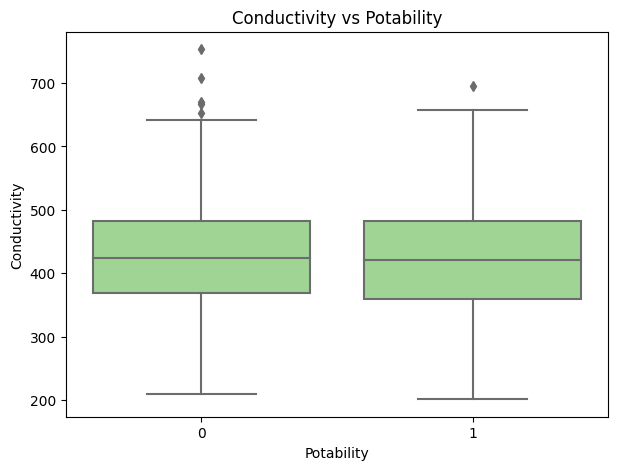

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


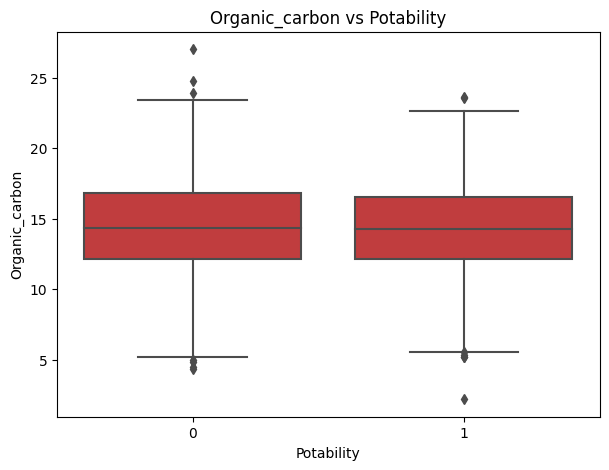

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


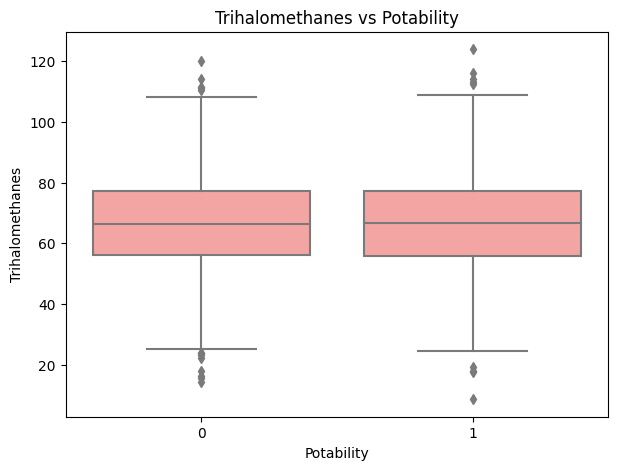

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


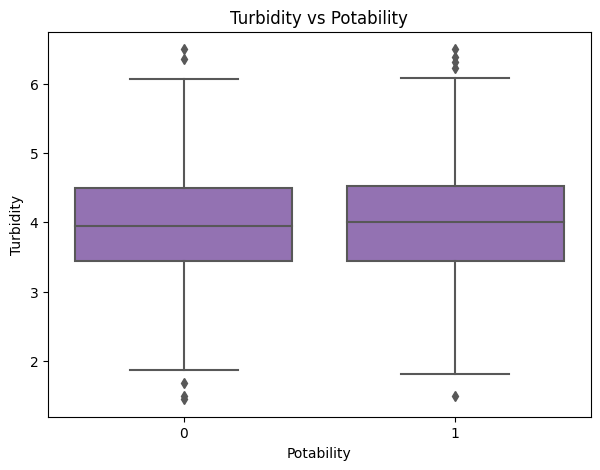

In [7]:
# boxplots de todos os preditores
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
colors=plt.cm.tab20.colors[:num_histograms]

for i in  range(len(columns)):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=wp_new, x=wp_new["Potability"], y=wp_new[columns[i]], color=colors[i])
    plt.title(f"{columns[i]} vs Potability")
    plt.show()

Item 4: Análise bivariada incondicional dos preditores

c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\clara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

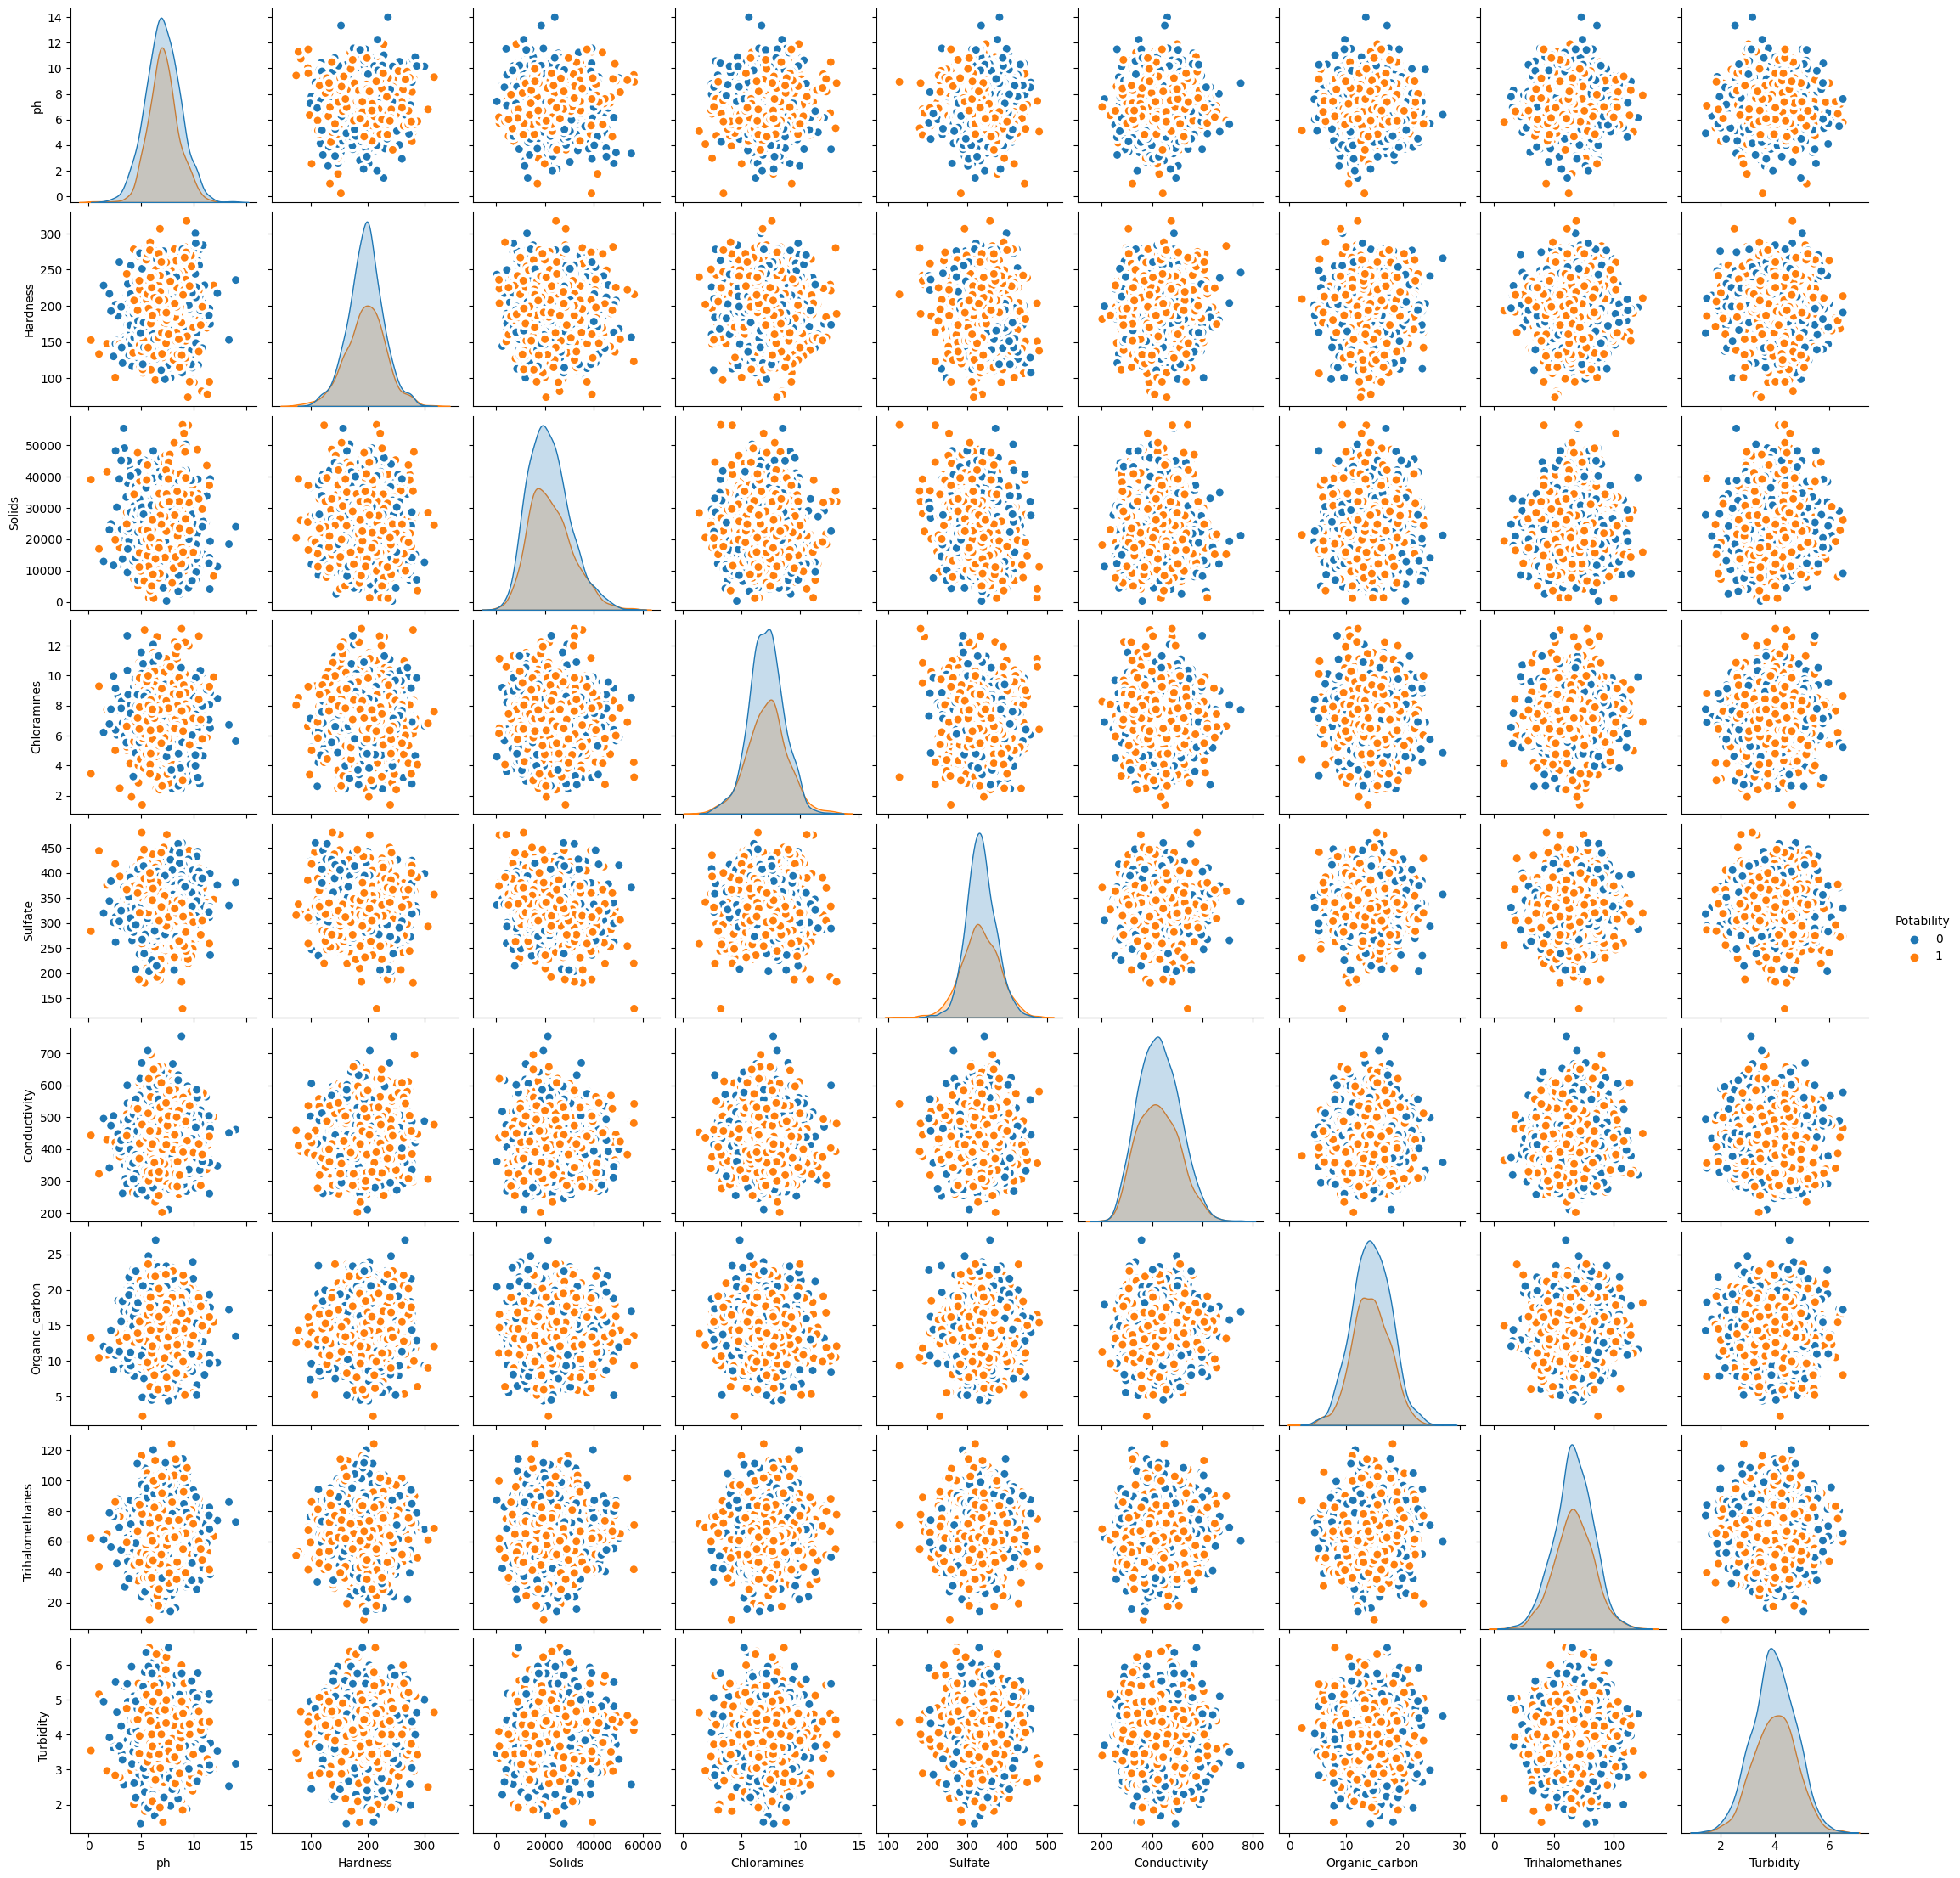

In [8]:
 # correlação entre os preditores
sns.pairplot(wp_new, kind="scatter", hue="Potability", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

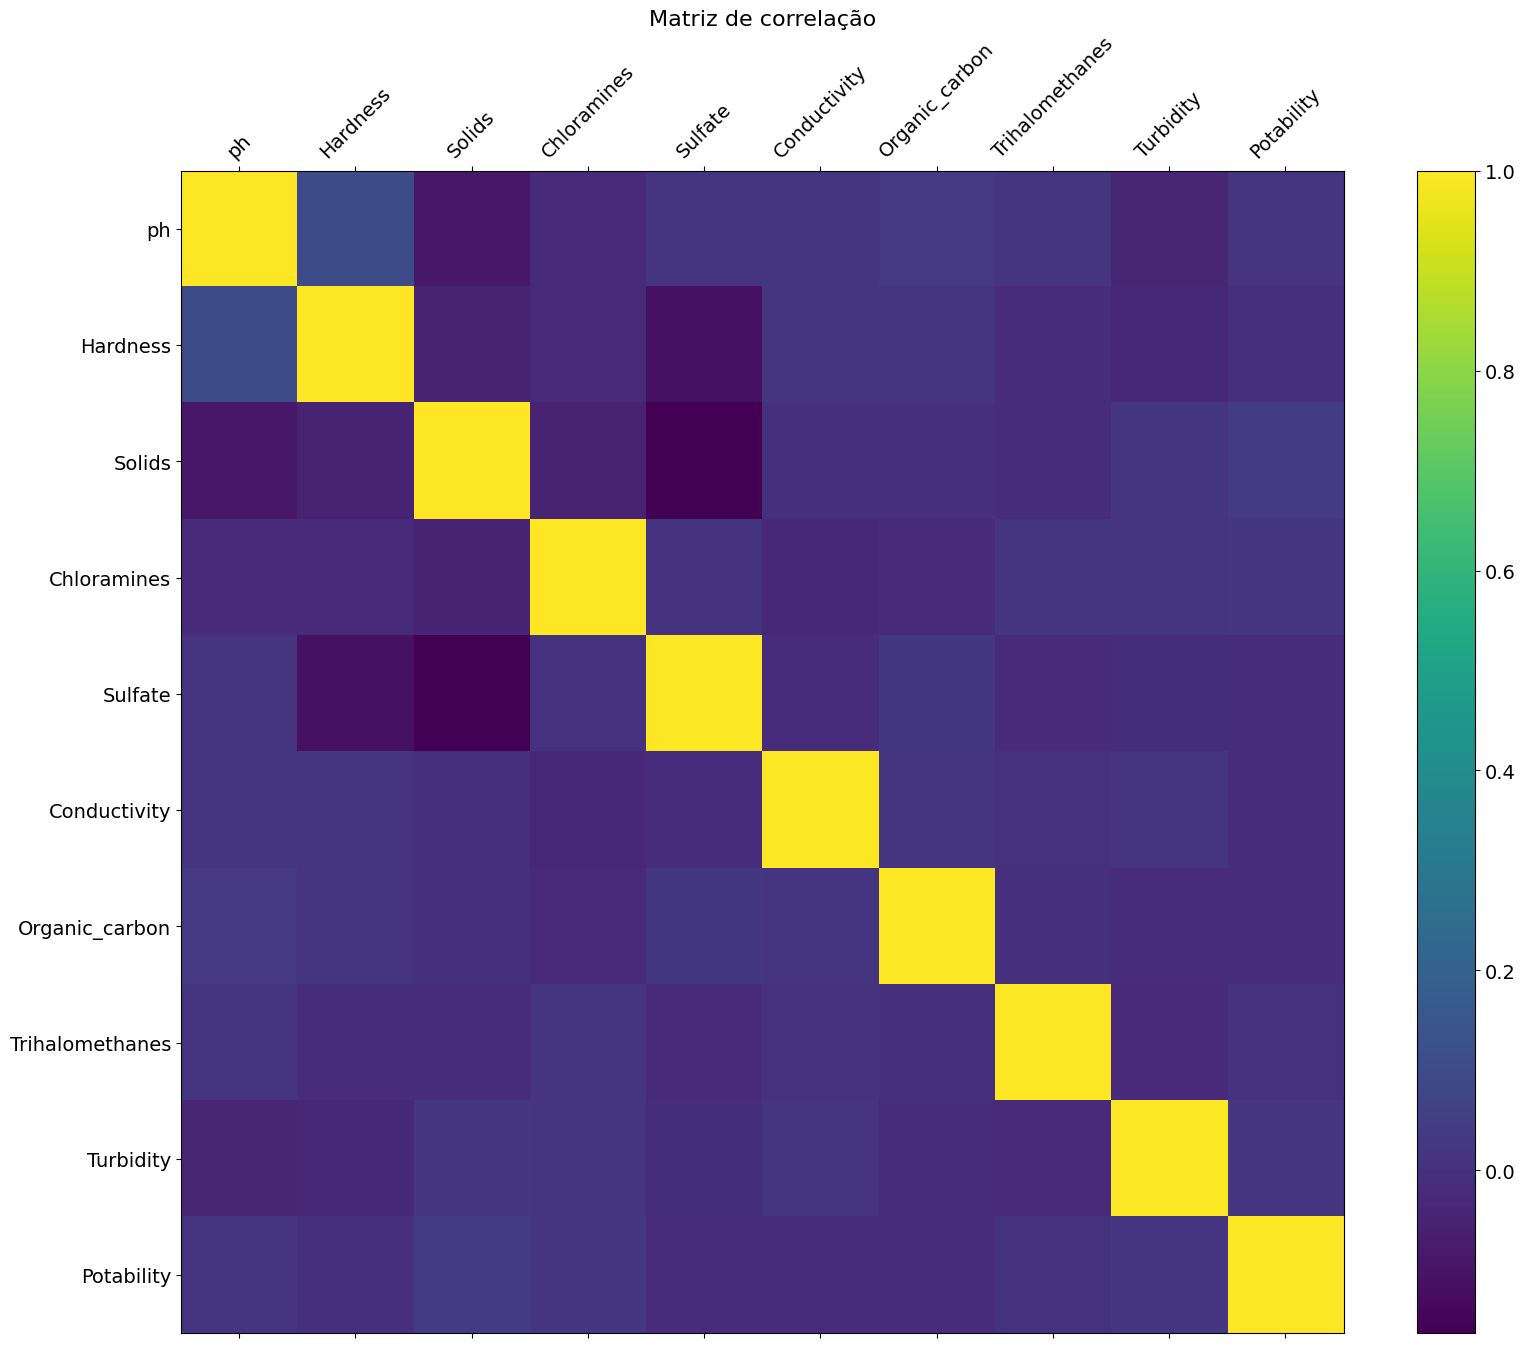

In [9]:
# matriz de correlação
f = plt.figure(figsize=(19, 15))
plt.matshow(wp_new.corr(), fignum=f.number)
plt.xticks(range(wp_new.select_dtypes(['number']).shape[1]), wp_new.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(wp_new.select_dtypes(['number']).shape[1]), wp_new.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlação', fontsize=16)

Item 5: Análise multivariada incondicional dos preditores

In [10]:
# normalizando os dados
x = wp_new.loc[:, columns].values
y = wp_new.loc[:,['Potability']].values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(1.3936829172597137e-17, 1.0)

In [11]:
# criando um dataset novo com os valores normalizados
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_wp = pd.DataFrame(x,columns=feat_cols)
normalised_wp.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562
2010,-1.537172,-0.070075,2.970287,0.020386,0.648718,1.238006,-0.139372,0.017846,0.597437


In [12]:
# fazendo a pca para dois componentes principais
pca_wp = PCA(n_components=2)
principal_components = pca_wp.fit_transform(x) # aplica a redução dimensional em x
principal_wp = pd.DataFrame(data=principal_components, columns=['principal component 1','principal component 2'])
final_wp = pd.concat([principal_wp, wp_new[['Potability']]],axis=1) # adicionando a potabilidade da água 
final_wp.tail()

,principal component 1,principal component 2,Potability
3267,NaN,NaN,1.0
3268,NaN,NaN,1.0
3269,NaN,NaN,1.0
3270,NaN,NaN,1.0
3271,NaN,NaN,1.0


In [13]:
print('Explained variation per principal component: {}'.format(pca_wp.explained_variance_ratio_))


Explained variation per principal component: [0.13410812 0.13005308]


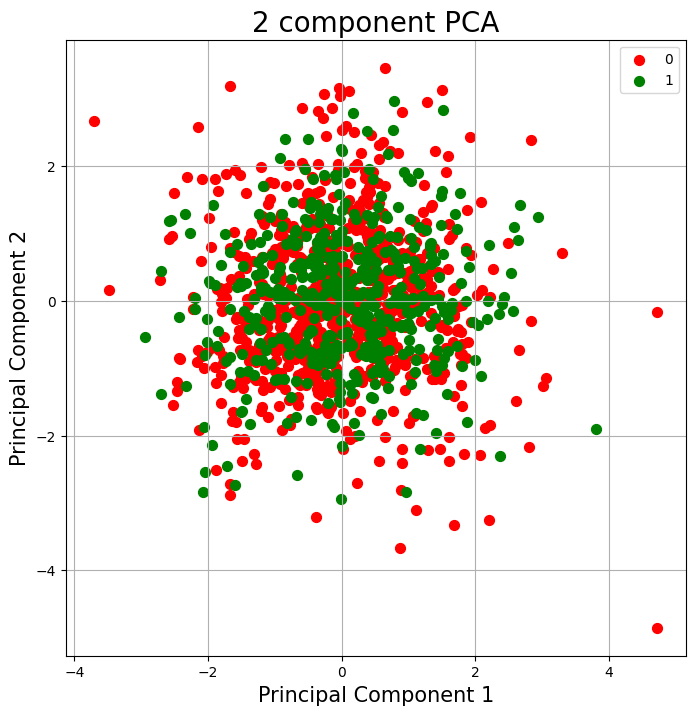

In [14]:
# visualização dos dados com a PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_wp['Potability'] == target
    ax.scatter(final_wp.loc[indicesToKeep, 'principal component 1']
               , final_wp.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()